 Load libraries and api key

In [24]:
import os
from dotenv import load_dotenv
from tqdm import tqdm

# Load API key from .env file in the root directory
load_dotenv()
API_KEY = os.environ.get('API_SIMFIN')

# 8) continue with the tutorial https://github.com/SimFin/simfin-tutorials/blob/master/01_Basics.ipynb

# matplotlib inline
import pandas as pd
import matplotlib

# Import the main functionality from the SimFin Python API.
import simfin as sf

# Import names used for easy access to SimFin's data-columns.
from simfin.names import *

# Set the directory where the data is downloaded
sf.set_data_dir('~/simfin_data/')

# Replace YOUR_API_KEY with your actual API-key.
sf.set_api_key(api_key=API_KEY)

Load and check data

In [25]:
df1 = sf.load(dataset='income', variant='ttm', market='us', refresh_days = 3)
print(df1.head())

Dataset "us-income-ttm" on disk (1 days old).
- Loading from disk ... Done!
  Ticker  SimFinId Currency  Fiscal Year Fiscal Period Report Date  \
0      A     45846      USD         2017            Q4  2017-10-31   
1      A     45846      USD         2018            Q1  2018-01-31   
2      A     45846      USD         2018            Q2  2018-04-30   
3      A     45846      USD         2018            Q3  2018-07-31   
4      A     45846      USD         2018            Q4  2018-10-31   

  Publish Date Restated Date  Shares (Basic)  Shares (Diluted)  ...  \
0   2017-12-21    2018-12-20     322000000.0       326000000.0  ...   
1   2018-03-06    2019-03-05     322250000.0       325250000.0  ...   
2   2018-05-31    2019-05-30     322500000.0       325500000.0  ...   
3   2018-08-30    2018-08-30     322250000.0       325000000.0  ...   
4   2018-12-20    2020-12-18     321000000.0       325000000.0  ...   

   Non-Operating Income (Loss)  Interest Expense, Net  \
0                  

/Users/gabrielepicheo/GitHub/.venv/lib/python3.11/site-packages/simfin/load.py:154: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


Overview of the subset of dataset

In [26]:
num_rows, num_columns = df1.shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

# Display basic information about the DataFrame
print("DataFrame Info:")
print(df1.info())

Number of Rows: 58876
Number of Columns: 28
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58876 entries, 0 to 58875
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Ticker                                    58876 non-null  object 
 1   SimFinId                                  58876 non-null  int64  
 2   Currency                                  58876 non-null  object 
 3   Fiscal Year                               58876 non-null  int64  
 4   Fiscal Period                             58876 non-null  object 
 5   Report Date                               58876 non-null  object 
 6   Publish Date                              58876 non-null  object 
 7   Restated Date                             58876 non-null  object 
 8   Shares (Basic)                            58596 non-null  float64
 9   Shares (Diluted)                          585

In [27]:
# Display the first few rows of the DataFrame
print("\nDataFrame Head:")
print(df1.head())



DataFrame Head:
  Ticker  SimFinId Currency  Fiscal Year Fiscal Period Report Date  \
0      A     45846      USD         2017            Q4  2017-10-31   
1      A     45846      USD         2018            Q1  2018-01-31   
2      A     45846      USD         2018            Q2  2018-04-30   
3      A     45846      USD         2018            Q3  2018-07-31   
4      A     45846      USD         2018            Q4  2018-10-31   

  Publish Date Restated Date  Shares (Basic)  Shares (Diluted)  ...  \
0   2017-12-21    2018-12-20     322000000.0       326000000.0  ...   
1   2018-03-06    2019-03-05     322250000.0       325250000.0  ...   
2   2018-05-31    2019-05-30     322500000.0       325500000.0  ...   
3   2018-08-30    2018-08-30     322250000.0       325000000.0  ...   
4   2018-12-20    2020-12-18     321000000.0       325000000.0  ...   

   Non-Operating Income (Loss)  Interest Expense, Net  \
0                  -38000000.0            -57000000.0   
1                  -2

Visualize colums

In [28]:
print(df1.columns)
selected_columns = ['Ticker','Fiscal Year','Fiscal Period','Operating Income (Loss)']

Index(['Ticker', 'SimFinId', 'Currency', 'Fiscal Year', 'Fiscal Period',
       'Report Date', 'Publish Date', 'Restated Date', 'Shares (Basic)',
       'Shares (Diluted)', 'Revenue', 'Cost of Revenue', 'Gross Profit',
       'Operating Expenses', 'Selling, General & Administrative',
       'Research & Development', 'Depreciation & Amortization',
       'Operating Income (Loss)', 'Non-Operating Income (Loss)',
       'Interest Expense, Net', 'Pretax Income (Loss), Adj.',
       'Abnormal Gains (Losses)', 'Pretax Income (Loss)',
       'Income Tax (Expense) Benefit, Net',
       'Income (Loss) from Continuing Operations',
       'Net Extraordinary Gains (Losses)', 'Net Income',
       'Net Income (Common)'],
      dtype='object')


In [29]:
df1[selected_columns]

,Ticker,Fiscal Year,Fiscal Period,Operating Income (Loss)
0,A,2017,Q4,841000000
1,A,2018,Q1,864000000
2,A,2018,Q2,873000000
3,A,2018,Q3,897000000
4,A,2018,Q4,889000000
...,...,...,...,...
58871,ZYXI,2021,Q2,6440000
58872,ZYXI,2021,Q3,13077000
58873,ZYXI,2021,Q4,22366000
58874,ZYXI,2022,Q1,25353000


Indexing dataframe

In [30]:
df2 = sf.load(dataset='income', variant='annual', market='us',
              index=[TICKER, REPORT_DATE],
              parse_dates=[REPORT_DATE, PUBLISH_DATE, RESTATED_DATE])

Dataset "us-income-annual" on disk (4 days old).
- Loading from disk ... 

/Users/gabrielepicheo/GitHub/.venv/lib/python3.11/site-packages/simfin/load.py:154: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


Done!


In [31]:
print(df2.head())

                    SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2017-10-31      45846      USD         2017            FY   2017-12-21   
       2018-10-31      45846      USD         2018            FY   2018-12-20   
       2019-10-31      45846      USD         2019            FY   2019-12-19   
       2020-10-31      45846      USD         2020            FY   2020-12-18   
       2021-10-31      45846      USD         2021            FY   2021-12-17   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
A      2017-10-31     2018-12-20     322000000.0       326000000.0   
       2018-10-31     2020-12-18     321000000.0       325000000.0   
       2019-10-31     2021-12-17     314000000.0       318000000.0   
       2020-10-31     2022-12-21     309000000.0       312000000.0   
       2021-

Lookup ticker and extract columns

In [32]:
df2.loc['MSFT']

,SimFinId,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
Report Date,,,,,,,,,,,,,,,,,,,,,
2018-06-30,59265,USD,2018,FY,2018-08-03,2020-07-30,7.700000e+09,7.794000e+09,1.103600e+11,-3.835300e+10,...,1.416000e+09,NaN,36474000000,NaN,36474000000,-1.990300e+10,16571000000,NaN,16571000000,16571000000
2019-06-30,59265,USD,2019,FY,2019-08-01,2021-07-29,7.673000e+09,7.753000e+09,1.258430e+11,-4.291000e+10,...,7.290000e+08,NaN,43688000000,NaN,43688000000,-4.448000e+09,39240000000,NaN,39240000000,39240000000
2020-06-30,59265,USD,2020,FY,2020-07-30,2022-07-28,7.610000e+09,7.683000e+09,1.430150e+11,-4.607800e+10,...,7.700000e+07,NaN,53036000000,NaN,53036000000,-8.755000e+09,44281000000,NaN,44281000000,44281000000
2021-06-30,59265,USD,2021,FY,2021-07-29,2023-07-27,7.554000e+09,7.617000e+09,1.680880e+11,-5.223200e+10,...,1.186000e+09,NaN,71102000000,NaN,71102000000,-9.831000e+09,61271000000,NaN,61271000000,61271000000
2022-06-30,59265,USD,2022,FY,2022-07-28,2023-07-27,7.496000e+09,7.540000e+09,1.982700e+11,-6.265000e+10,...,3.330000e+08,NaN,83716000000,NaN,83716000000,-1.097800e+10,72738000000,NaN,72738000000,72738000000


In [33]:
df2.loc['MSFT'][OPERATING_INCOME]
selected_columns2 = ['Fiscal Year','Fiscal Period','Operating Income (Loss)']
df2[selected_columns2].loc['MSFT']

,Fiscal Year,Fiscal Period,Operating Income (Loss)
Report Date,,,
2018-06-30,2018,FY,35058000000
2019-06-30,2019,FY,42959000000
2020-06-30,2020,FY,52959000000
2021-06-30,2021,FY,69916000000
2022-06-30,2022,FY,83383000000


Plot

<Axes: xlabel='Report Date'>

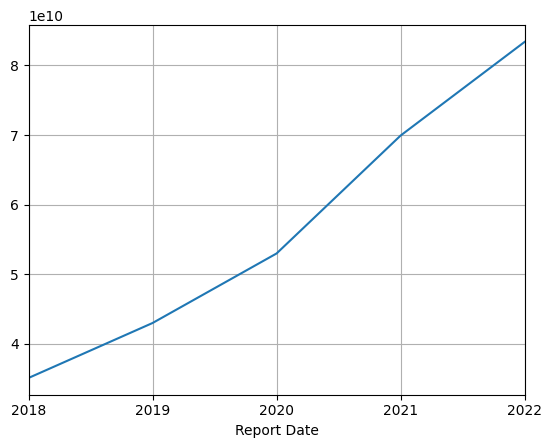

In [34]:
df2.loc['MSFT'][OPERATING_INCOME].plot(grid = True)

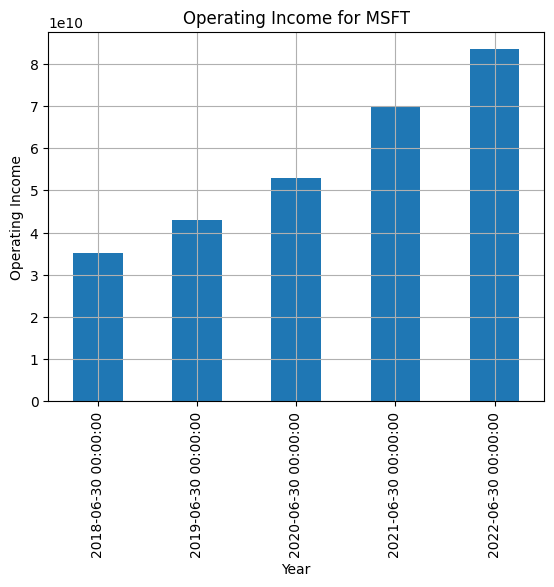

In [35]:
# Plot a bar chart for the 'Operating Income' column of 'MSFT' using loc
df2.loc['MSFT'][OPERATING_INCOME].plot.bar(grid=True)

matplotlib.pyplot.xlabel('Year')  # Use the full module name here
matplotlib.pyplot.ylabel('Operating Income')  # Use the full module name here
matplotlib.pyplot.title('Operating Income for MSFT')  # Use the full module name here
matplotlib.pyplot.show()  # Display the plot

Load (special functions) all financial statments

In [36]:
df_income = sf.load_income(variant='ttm', market='us')
print(df_income.head())

Dataset "us-income-ttm" on disk (1 days old).
- Loading from disk ... 

/Users/gabrielepicheo/GitHub/.venv/lib/python3.11/site-packages/simfin/load.py:154: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


Done!
                    SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2017-10-31      45846      USD         2017            Q4   2017-12-21   
       2018-01-31      45846      USD         2018            Q1   2018-03-06   
       2018-04-30      45846      USD         2018            Q2   2018-05-31   
       2018-07-31      45846      USD         2018            Q3   2018-08-30   
       2018-10-31      45846      USD         2018            Q4   2018-12-20   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
A      2017-10-31     2018-12-20     322000000.0       326000000.0   
       2018-01-31     2019-03-05     322250000.0       325250000.0   
       2018-04-30     2019-05-30     322500000.0       325500000.0   
       2018-07-31     2018-08-30     322250000.0       325000000.0   
      

In [37]:
df_balance = sf.load_balance(variant='ttm', market='us')
print(df_balance.columns)
print(df_balance.head())

Dataset "us-balance-ttm" on disk (1 days old).
- Loading from disk ... 

/Users/gabrielepicheo/GitHub/.venv/lib/python3.11/site-packages/simfin/load.py:154: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


Done!
Index(['SimFinId', 'Currency', 'Fiscal Year', 'Fiscal Period', 'Publish Date',
       'Restated Date', 'Shares (Basic)', 'Shares (Diluted)',
       'Cash, Cash Equivalents & Short Term Investments',
       'Accounts & Notes Receivable', 'Inventories', 'Total Current Assets',
       'Property, Plant & Equipment, Net',
       'Long Term Investments & Receivables', 'Other Long Term Assets',
       'Total Noncurrent Assets', 'Total Assets', 'Payables & Accruals',
       'Short Term Debt', 'Total Current Liabilities', 'Long Term Debt',
       'Total Noncurrent Liabilities', 'Total Liabilities',
       'Share Capital & Additional Paid-In Capital', 'Treasury Stock',
       'Retained Earnings', 'Total Equity', 'Total Liabilities & Equity'],
      dtype='object')
                    SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2017-10-31      45846      USD         2017            Q4   

In [38]:
df_cashflow = sf.load_cashflow(variant='ttm', market='us')
print(df_cashflow.columns)
print(df_cashflow.head())

Dataset "us-cashflow-ttm" on disk (1 days old).
- Loading from disk ... 

/Users/gabrielepicheo/GitHub/.venv/lib/python3.11/site-packages/simfin/load.py:154: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


Done!
Index(['SimFinId', 'Currency', 'Fiscal Year', 'Fiscal Period', 'Publish Date',
       'Restated Date', 'Shares (Basic)', 'Shares (Diluted)',
       'Net Income/Starting Line', 'Depreciation & Amortization',
       'Non-Cash Items', 'Change in Working Capital',
       'Change in Accounts Receivable', 'Change in Inventories',
       'Change in Accounts Payable', 'Change in Other',
       'Net Cash from Operating Activities',
       'Change in Fixed Assets & Intangibles',
       'Net Change in Long Term Investment',
       'Net Cash from Acquisitions & Divestitures',
       'Net Cash from Investing Activities', 'Dividends Paid',
       'Cash from (Repayment of) Debt', 'Cash from (Repurchase of) Equity',
       'Net Cash from Financing Activities', 'Net Change in Cash'],
      dtype='object')
                    SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2017-10-31      45846    

Report Date vs. Publish Date vs. Restated Date

By default the functions sf.load_income(), sf.load_balance() and sf.load_cashflow() use the Report Date as an index, but it can be switched to use the Publish Date instead, by setting the index argument. We give a list of the indices we want in the resulting DataFrame, in this case we want both the Ticker and Publish Date.

In [39]:
df_income2 = sf.load_income(variant='ttm', market='us',
                            index=[TICKER, PUBLISH_DATE])
print(df_income2.head())

Dataset "us-income-ttm" on disk (1 days old).
- Loading from disk ... 

/Users/gabrielepicheo/GitHub/.venv/lib/python3.11/site-packages/simfin/load.py:154: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


Done!
                     SimFinId Currency  Fiscal Year Fiscal Period Report Date  \
Ticker Publish Date                                                             
A      2017-12-21       45846      USD         2017            Q4  2017-10-31   
       2018-03-06       45846      USD         2018            Q1  2018-01-31   
       2018-05-31       45846      USD         2018            Q2  2018-04-30   
       2018-08-30       45846      USD         2018            Q3  2018-07-31   
       2018-12-20       45846      USD         2018            Q4  2018-10-31   

                    Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Publish Date                                                   
A      2017-12-21      2018-12-20     322000000.0       326000000.0   
       2018-03-06      2019-03-05     322250000.0       325250000.0   
       2018-05-31      2019-05-30     322500000.0       325500000.0   
       2018-08-30      2018-08-30     322250000.0       325000000.0   


Depending on the kind of analysis you want to do, an alternative to using the Publish Date as the DataFrame index, is to add an offset to all the Report Dates in a DataFrame using a small helper-function. For example, we can add 90 days (about 3 months) to all the Report Dates, and use that as an estimate for when the data was available publicly:

In [40]:
df_income3 = sf.add_date_offset(df=df_income,
                                date_index=REPORT_DATE,
                                offset=pd.DateOffset(days=90))
print(df_income3.head())



                    SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2018-01-29      45846      USD         2017            Q4   2017-12-21   
       2018-05-01      45846      USD         2018            Q1   2018-03-06   
       2018-07-29      45846      USD         2018            Q2   2018-05-31   
       2018-10-29      45846      USD         2018            Q3   2018-08-30   
       2019-01-29      45846      USD         2018            Q4   2018-12-20   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
A      2018-01-29     2018-12-20     322000000.0       326000000.0   
       2018-05-01     2019-03-05     322250000.0       325250000.0   
       2018-07-29     2019-05-30     322500000.0       325500000.0   
       2018-10-29     2018-08-30     322250000.0       325000000.0   
       2019-

Comparing with the original

In [41]:
print(df_income.head())

                    SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2017-10-31      45846      USD         2017            Q4   2017-12-21   
       2018-01-31      45846      USD         2018            Q1   2018-03-06   
       2018-04-30      45846      USD         2018            Q2   2018-05-31   
       2018-07-31      45846      USD         2018            Q3   2018-08-30   
       2018-10-31      45846      USD         2018            Q4   2018-12-20   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
A      2017-10-31     2018-12-20     322000000.0       326000000.0   
       2018-01-31     2019-03-05     322250000.0       325250000.0   
       2018-04-30     2019-05-30     322500000.0       325500000.0   
       2018-07-31     2018-08-30     322250000.0       325000000.0   
       2018-

Load share price "latest" or daily

In [42]:
%%time
df_prices_latest = sf.load_shareprices(variant='latest', market='us')
df_prices_latest.head()

Dataset "us-shareprices-latest" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!
CPU times: user 65.8 ms, sys: 12.8 ms, total: 78.6 ms
Wall time: 2.94 s


/Users/gabrielepicheo/GitHub/.venv/lib/python3.11/site-packages/simfin/load.py:154: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


,,SimFinId,Open,Low,High,Close,Adj. Close,Dividend,Volume,Shares Outstanding
Ticker,Date,,,,,,,,,
A,2023-08-15,45846,126.31,125.25,127.18,125.65,125.65,NaN,2186509,2.960000e+08
AA,2023-08-15,367153,31.48,30.30,31.48,30.34,30.34,NaN,5743863,1.784043e+08
AAC,2023-08-15,7962652,10.64,10.63,10.65,10.65,10.65,NaN,58591,9.849854e+07
AACI,2023-08-15,11820349,10.59,10.57,10.70,10.65,10.65,NaN,5755,5.709500e+06
AAGH,2023-08-15,12444287,NaN,NaN,NaN,NaN,NaN,NaN,450000,2.109094e+10


daily price covering several years. (large download)

In [ ]:
%%time
# df_prices = sf.load_shareprices(variant='daily', market='us')

Load companies info

In [44]:
df_companies = sf.load_companies(index=TICKER, market='us')
print(df_companies.head())

Dataset "us-companies" on disk (0 days old).
- Loading from disk ... Done!
        SimFinId                  Company Name  IndustryId
Ticker                                                    
A          45846      AGILENT TECHNOLOGIES INC    106001.0
A18      1253413            Trip.com Group Ltd         NaN
A21      1333027                  Li Auto Inc.         NaN
AA        367153                    Alcoa Corp    110004.0
AAC      7962652  Ares Acquisition Corporation    104002.0


/Users/gabrielepicheo/GitHub/.venv/lib/python3.11/site-packages/simfin/load.py:154: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


load sector and industries

In [46]:
df_industries = sf.load_industries()
print(df_industries.head())

Dataset "industries" on disk (0 days old).
- Loading from disk ... Done!
                 Sector                    Industry
IndustryId                                         
100001      Industrials         Industrial Products
100002      Industrials           Business Services
100003      Industrials  Engineering & Construction
100004      Industrials            Waste Management
100005      Industrials     Industrial Distribution


/Users/gabrielepicheo/GitHub/.venv/lib/python3.11/site-packages/simfin/load.py:154: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


In [48]:
industry_id = df_companies.loc['MSFT'][INDUSTRY_ID]
df_industries.loc[industry_id]

Sector                Technology
Industry    Application Software
Name: 101003, dtype: object

Dataset and columns info

In [49]:
sf.info_datasets()

Dataset "datasets" not on disk.
- Downloaded bytes: 230,435
- Moving file to data-dir ... Done!
- Loading from disk ... Done!
All datasets: balance, balance-banks, balance-insurance, cashflow,
              cashflow-banks, cashflow-insurance, companies, derived,
              derived-banks, derived-insurance, derived-shareprices, income,
              income-banks, income-insurance, industries, markets, shareprices


In [50]:
sf.info_datasets('companies')

Dataset:  companies
Variants: -
Markets:  ca, cn, de, us
Columns:  (The * marks data that requires a paid subscription)
- "Ticker" TICKER
- "SimFinId" SIMFIN_ID
- "Company Name" COMPANY_NAME
- "IndustryId" INDUSTRY_ID


In [51]:
sf.info_columns(COMPANY_NAME)

Dataset "columns" not on disk.
- Downloaded bytes: 113,537
- Moving file to data-dir ... Done!
- Loading from disk ... Done!
Name:        "Company Name"
Shortcuts:   COMPANY_NAME
Premium:     False
Datasets:    companies
Description: Name of a company e.g. 'Microsoft'.



In [52]:
sf.info_columns('shares')

Name:        "Volume"
Shortcuts:   SHARE_VOLUME, VOLUME
Premium:     False
Datasets:    shareprices
Description: Number of shares traded during the day. Adjusted for stock-splits.

Name:        "Shares Outstanding"
Shortcuts:   SHARES_OUTSTANDING
Premium:     False
Datasets:    shareprices
Description: Number of common shares outstanding as per the last reported date.

Name:        "Shares (Basic)"
Shortcuts:   SHARES_BASIC
Premium:     False
Datasets:    balance, balance-banks, balance-insurance, cashflow,
             cashflow-banks, cashflow-insurance, income, income-banks,
             income-insurance
Description: Shares outstanding NOT adjusted for dilution from stock-options
             etc. Weighted average for the period. Adjusted for stock-splits.

Name:        "Shares (Diluted)"
Shortcuts:   SHARES_DILUTED
Premium:     False
Datasets:    balance, balance-banks, balance-insurance, cashflow,
             cashflow-banks, cashflow-insurance, income, income-banks,
             i